# Problems 3-4 intro

One of the most typical problems in GIS is the situation where you have a set of coordinates in some file, and you need to map those. Python is a really handy tool for these kind of situations, as it is possible to read data from (basically) any kind of input datafile (such as csv-, txt-, excel-, gpx-files (gps data), databases etc.). 

Let's see how we can read data from a file and create Point -objects from them. Later on in the course, we will learn how to write the data in various GIS file formats (including Shapefiles and geopackages). 

Our dataset **[travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt)** consist of 
travel times between specific locations in Helsinki Region. The file is located in the `data` folder in this exercise repository. The first four rows of our data look like this:

```
   from_id;to_id;fromid_toid;route_number;at;from_x;from_y;to_x;to_y;total_route_time;route_time;route_distance
   5861326;5785640;5861326_5785640;1;08:10;24.9704379;60.3119173;24.8560344;60.399940599999994;125.0;99.0;22917.6
   5861326;5785641;5861326_5785641;1;08:10;24.9704379;60.3119173;24.8605682;60.4000135;123.0;102.0;23123.5
   5861326;5785642;5861326_5785642;1;08:10;24.9704379;60.3119173;24.865102;60.4000863;125.0;103.0;23241.3
```

In this exercise, we are interested in these columns:

| Column | Description |
|--------|-------------|
| from_x | x-coordinate of the **origin** location (longitude) |
| from_y | y-coordinate of the **origin** location (latitude) |
| to_x   | x-coordinate of the **destination** location (longitude)|
| to_y   | y-coordinate of the **destination** location (latitude) |
| total_route_time | Travel time with public transportation at the route |

More information about the input data set is available at the Digital Geography Lab / Accessibility Research Group  website: https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix/.




## Problem 3: Reading coordinates from a file and creating geometries (*5 points*) 

In problem 3, our goal is to read in the data using Pandas and create two lists `orig_points`and `dest_points` that contain the origin points (based on columns `from_x` and `from_y`) and destination points (based on columns `to_x` and `to_y`) as Shapely objects.

### Steps

1: Read the [data/travelTimes_2015_Helsinki.txt](data/travelTimes_2015_Helsinki.txt) file into a variable **`data`** using  pandas.


In [5]:
import os
os.getcwd()

'C:\\Users\\Rimpula\\Desktop\\GIS-Python\\exercise-1-eeroa1-main'

In [6]:
# reading csv
import pandas as pd
data = pd.read_csv("data/travelTimes_2015_Helsinki.txt", sep=";")
data

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14638,5861326,5967091,5861326_5967091,1,08:06,24.970438,60.311917,24.559702,60.174754,94.0,72.0,40702.8,2.0
14639,5861326,5967092,5861326_5967092,1,08:06,24.970438,60.311917,24.564204,60.174837,97.0,75.0,40915.0,2.0
14640,5861326,5968733,5861326_5968733,1,08:06,24.970438,60.311917,24.555367,60.172428,89.0,66.0,40305.9,2.0
14641,5861326,5968734,5861326_5968734,1,08:06,24.970438,60.311917,24.559868,60.172511,93.0,71.0,40628.0,2.0


In [8]:
#Checking how many rows and columns there are:
col_count = len(data.columns)
row_count = data.count()[0]
print(col_count)
print(row_count)

13
14643


In [9]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# This test print should print first five rows in the data (if not, something is incorrect):
print(data.head())

   from_id    to_id      fromid_toid  route_number     at     from_x  \
0  5861326  5785640  5861326_5785640             1  08:10  24.970438   
1  5861326  5785641  5861326_5785641             1  08:10  24.970438   
2  5861326  5785642  5861326_5785642             1  08:10  24.970438   
3  5861326  5785643  5861326_5785643             1  08:10  24.970438   
4  5861326  5787544  5861326_5787544             1  08:10  24.970438   

      from_y       to_x       to_y  total_route_time  route_time  \
0  60.311917  24.856034  60.399941             125.0        99.0   
1  60.311917  24.860568  60.400014             123.0       102.0   
2  60.311917  24.865102  60.400086             125.0       103.0   
3  60.311917  24.869636  60.400159             129.0       107.0   
4  60.311917  24.842582  60.397478             118.0        92.0   

   route_distance  route_total_lines  
0         22917.6                2.0  
1         23123.5                2.0  
2         23241.3                2.0  
3 

2: Select the 4 columns that contain coordinate information (**'from_x'**, **'from_y'**, **'to_x'**, **'to_y'**) and store them in variable **`data`** (i.e. update the data -variable  to contain only these four columns).


In [10]:
# x and y coords
data = data[data.columns[data.columns.isin(["from_x", "from_y", "to_x", "to_y"])]]

In [11]:
data

,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478
...,...,...,...,...
14638,24.970438,60.311917,24.559702,60.174754
14639,24.970438,60.311917,24.564204,60.174837
14640,24.970438,60.311917,24.555367,60.172428
14641,24.970438,60.311917,24.559868,60.172511


In [12]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(list(data.columns))

['from_x', 'from_y', 'to_x', 'to_y']


3: Create two empty lists called **`orig_points`** and **`dest_points`**. We will store the shapely points in these lists in the next step.


In [13]:
orig_points=[]
dest_points=[]

In [14]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# List length should be zero at this point:
print('orig_points length:', len(orig_points))
print('dest_points length:', len(dest_points))

orig_points length: 0
dest_points length: 0


4: Create shapely points for each origin and destination and add origin points to `orig_points` list and destination points to `dest_points` list.

- Create origin points based on columns `from_x` and `from_y`
- Create destination points based on columns `to_x` and `to_y`

**HOW?**

**Approach A:** 

- Create a for-loop and iterate over the rows of your dataframe
- For each row, create Shapely Point -objects based on the coordinate columns (columns `from_x` and `from_y` for the origins and columns `to_x` and `to_y` for the destinations)
- Append the point objects into the **`orig_points`** -list and **`dest_point`** -list.

See [Geo-Python Lesson 6 materials for iterating data frame fows](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#iterating-over-rows) for more help.

**Approach B (advanced):**
- Apply the Shapely point constructor on each row all at once. 
    - Define your own function and apply it on the dataframe (in practice, the function is applied on each row). See [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) for help.
    - Alternatively, you can apply the Polygon constructor directly using a lambda function, See hints e.g. [in here](https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7).
    - You can store the outputs either to new columns in the dataframe, or separate variables (Pandas Series objects)
- Convert outputs into lists and assign as values for `orign_points` and `dest_points` lists (data type needs to be a list for the next steps!).




In [15]:
data.loc[:,"from_x"]

0        24.970438
1        24.970438
2        24.970438
3        24.970438
4        24.970438
           ...    
14638    24.970438
14639    24.970438
14640    24.970438
14641    24.970438
14642    24.970438
Name: from_x, Length: 14643, dtype: float64

In [16]:
#Transferring x and y coordinates into points and inserting them into origin_points and dest_points
orig_points=[]
dest_points=[]
from shapely.geometry import Point, LineString, Polygon
for i in range(len(data)):
    point = Point(data.loc[i,"from_x"], data.loc[i,"from_y"])
    point2 = Point(data.loc[i, "to_x"], data.loc[i, "to_y"])
    orig_points.append(point)
    dest_points.append(point2)

In [17]:
orig_points[0:5]

In [18]:
print("ORIGIN X Y:", orig_points[0].x, orig_points[0].y)

ORIGIN X Y: 24.9704379 60.3119173


**NOTE: After you have solved this problem, we recommend that you restart the kernel and run all cells again!**

In [19]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# This test print should print out the first origin and destination coordinates in the two lists:
print("ORIGIN X Y:", orig_points[0].x, orig_points[0].y)
print("DESTINATION X Y:", dest_points[0].x, dest_points[0].y)

#Check that you created a correct amount of points:
assert len(orig_points) == len(data), "Number of origin points must be the same as number of rows in the original file"
assert len(dest_points) == len(data), "Number of destination points must be the same as number of rows in the original file"

ORIGIN X Y: 24.9704379 60.3119173
DESTINATION X Y: 24.8560344 60.3999406


Remember to commit your code using git after each major change (for example, after solving each problem).

## Done!

That's it. Now you are ready to continue for the final Problem 4.

## Problem 4: Creating LineStrings that represent the movements (*5 points*):

This task continuous where we left in Problem 3. In this problem, the goal is to create lines (Shapely LineString objects) between each origin-destination pair.
   
1: Create a list called `lines`


In [20]:
lines=[]

In [21]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Lines length should be zero at this stage:
print('lines length:', len(lines))

lines length: 0


2a: Create a Shapely LineString -object for each origin and destination pair

  - Alternative 1: You can take advantage of `range()` function and index values to access the values from two lists at the same time inside a for-loop.
     
  - Alternative 2: You can use `zip()` function to iterate over many lists at the same time. [See hints for this week](https://autogis-site.readthedocs.io/en/latest/lessons/L1/exercise-1.html#iterating-multiple-lists-simultaneously)
  
2b: Add each LineString object into the `lines` -list you created before.


In [15]:
#point_x = orig_points[0]
#point_y = dest_points[0]
#points_xy = [point_x, point_y]
#line1 = LineString(points_xy)
#line1

In [22]:
# Creating lines from the points with zip
for i,j in zip(orig_points,dest_points):
    points = [i,j]
    line1 = LineString(points)
    lines.append(line1)

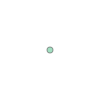

In [23]:
orig_points[0]

**NOTE: After you have solved this problem, we recommend that you restart the kernel and run all cells again! There is a risk that you append the same points to the lists many times if you run the cell multiple times without restarting the kernel.**

In [24]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

#Test that the list has correct number of LineStrings
assert len(lines) == len(data), "There should be as many lines as there are rows in the original data"

3: Create a variable called **`total_length`**, and store the total (Euclidian) distance of all the origin-destination LineStrings that we just created into that variable.

  - Hint: You might want to iterate over the lines and update the total lenght on each iteration.


In [25]:
"""Calculating total length"""
total_length = 0
for line in range(len(lines)):
    total_length = total_length + lines[line].length
total_length

3148.570780865155

In [26]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# This test print should print the total length of all lines
print("Total length of all lines is", round(total_length, 2))

Total length of all lines is 3148.57


4: write the previous parts, i.e. the creation of the LineString and calculating the total distance, into dedicated functions:  

- `create_od_lines()`: Takes two lists of Shapely Point -objects as input and returns a list of LineStrings
- `calculate_total_distance()`: Takes a list of LineString geometries as input and returs their total length

You can copy and paste the codes you have written earlier into the functions. Below, you can find a code cell for testing your functions (you should get the same result as earler).

**Note: avoid using the same variable names as earlier inside your functions!** Functions are often defined at the top of the script file (or jupyter notebook), and now that we have them here at the very end you might accidentally alter an existing variable inside your functions. To avoid this, alter the variable names inside your own functions if you re-use code from this notebook. 

In [27]:
#modifying into functions
lines = []
def create_od_lines(orig_points,dest_points):
    """Creating lines from origin and destination points"""
    for i,j in zip(orig_points,dest_points):
        points = [i,j]
        line1 = LineString(points)
        lines.append(line1)
    return lines


In [28]:
def calculate_total_distance(lines):
    """Calculating total length of lines"""
    total_length = 0
    for line in range(len(lines)):
        total_length = total_length + lines[line].length
    return total_length

In [29]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Use the functions
# -----------------

# Create origin-destination lines
od_lines = create_od_lines(orig_points, dest_points)

# Calculate the total distance
tot_dist = calculate_total_distance(od_lines)

print("Total distance", round(tot_dist,2))

Total distance 3148.57



## All done!

Awesome, now you have successfully practiced how geometries can be created in Python. Next week we will start using them actively.